# NET4103 / NSGL — FB100 Homework Notebook

This notebook contains the **computational experiments** for Questions **2–6** on the Facebook100 dataset (`data/*.gml`).
I keep the code cells unchanged; the **Markdown cells** below explain what each block computes and how to interpret the outputs.

**Dataset:** FB100 networks (100 `.gml` files).  
**Node attributes available:** `student_fac`, `gender`, `major_index`, `second_major`, `dorm`, `year`, `high_school`.


# Question 2 — Network properties (Caltech36, MIT8, JohnsHopkins55)
In Q2 I compute basic structural statistics on the **largest connected component (LCC)** of three FB100 graphs.
Outputs: degree histograms, density + clustering table, and degree–clustering correlation/scatter plots.

In [2]:
import os
import networkx as nx
import numpy as np
import pandas as pd

DATA_DIR = "data"

# list gml files
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".gml")])
print("Number of .gml files:", len(files))
print("First 10 files:", files[:10])
print("Last 10 files:", files[-10:])

# load one example graph (smallest by file size to be quick)
sizes = [(f, os.path.getsize(os.path.join(DATA_DIR, f))) for f in files]
f0 = sorted(sizes, key=lambda x: x[1])[0][0]
path0 = os.path.join(DATA_DIR, f0)

G = nx.read_gml(path0)
print("\nLoaded:", f0)
print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())

# inspect node attributes
sample_node = next(iter(G.nodes()))
print("\nSample node id:", sample_node)
print("Attributes keys:", list(G.nodes[sample_node].keys()))

# check missing values frequency for key attributes (if present)
attrs_to_check = ["student_fac", "gender", "major_index", "second_major", "dorm", "year", "high_school"]
for a in attrs_to_check:
    if a in G.nodes[sample_node]:
        vals = [G.nodes[u].get(a, None) for u in G.nodes()]
        vals = np.array(vals, dtype=object)
        missing = np.sum(pd.isna(vals)) + np.sum(vals == "NA") + np.sum(vals == -1)
        print(f"{a:>12}: example={vals[0]} | missing-ish count={missing}/{len(vals)}")


Number of .gml files: 100
First 10 files: ['American75.gml', 'Amherst41.gml', 'Auburn71.gml', 'BC17.gml', 'BU10.gml', 'Baylor93.gml', 'Berkeley13.gml', 'Bingham82.gml', 'Bowdoin47.gml', 'Brandeis99.gml']
Last 10 files: ['Villanova62.gml', 'Virginia63.gml', 'Wake73.gml', 'WashU32.gml', 'Wellesley22.gml', 'Wesleyan43.gml', 'William77.gml', 'Williams40.gml', 'Wisconsin87.gml', 'Yale4.gml']

Loaded: Caltech36.gml
Nodes: 769 Edges: 16656

Sample node id: 0
Attributes keys: ['student_fac', 'gender', 'major_index', 'second_major', 'dorm', 'year', 'high_school']
 student_fac: example=1 | missing-ish count=0/769
      gender: example=1 | missing-ish count=0/769
 major_index: example=199 | missing-ish count=0/769
second_major: example=0 | missing-ish count=0/769
        dorm: example=169 | missing-ish count=0/769
        year: example=2008 | missing-ish count=0/769
 high_school: example=3387 | missing-ish count=0/769


In [4]:
import os
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "data"
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

unis = {
    "Caltech36": "Caltech36.gml",
    "MIT8": "MIT8.gml",
    "JohnsHopkins55": "Johns Hopkins55.gml",
}

graphs = {}
for name, fname in unis.items():
    path = os.path.join(DATA_DIR, fname)
    G = nx.read_gml(path)
    graphs[name] = G
    print(f"{name}: nodes={G.number_of_nodes()} edges={G.number_of_edges()}")


Caltech36: nodes=769 edges=16656
MIT8: nodes=6440 edges=251252
JohnsHopkins55: nodes=5180 edges=186586


## Q2(a) Degree distribution
For each graph, plot the **degree histogram** (distribution of number of friends).
I report the skewed/heavy-tailed shape typical of social networks (many low-degree nodes, few hubs).

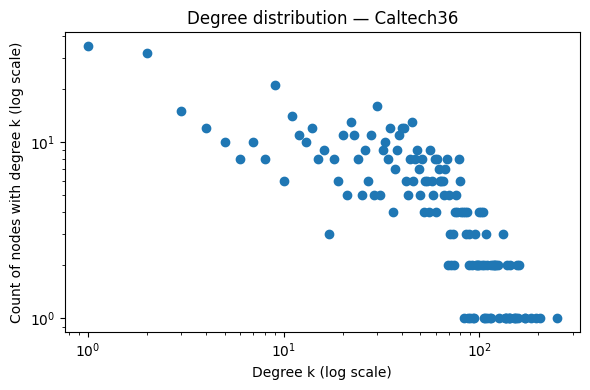

Saved: outputs\q2a_degree_distribution_Caltech36.png


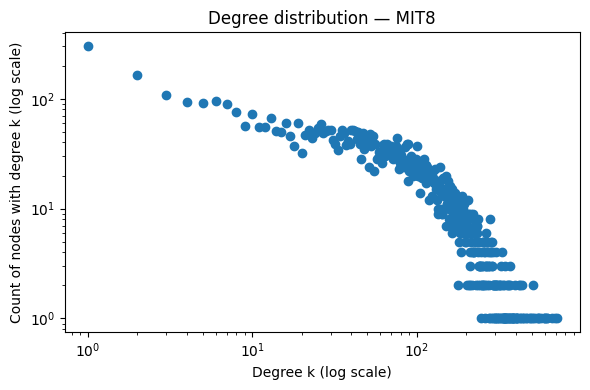

Saved: outputs\q2a_degree_distribution_MIT8.png


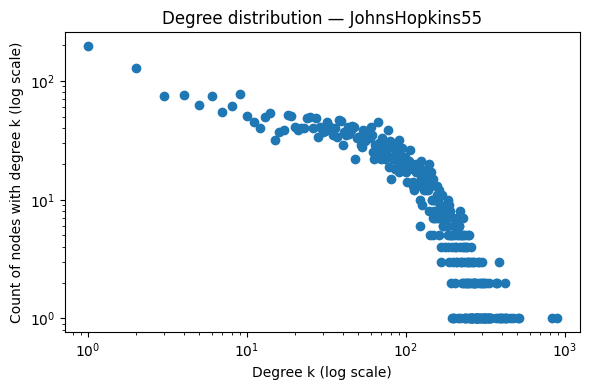

Saved: outputs\q2a_degree_distribution_JohnsHopkins55.png


In [5]:
def degree_counts(G):
    deg = np.array([d for _, d in G.degree()], dtype=int)
    maxd = int(deg.max()) if len(deg) else 0
    counts = np.bincount(deg, minlength=maxd+1)
    ks = np.arange(len(counts))
    mask = counts > 0
    return ks[mask], counts[mask]

for name, G in graphs.items():
    ks, counts = degree_counts(G)
    plt.figure(figsize=(6,4))
    plt.loglog(ks, counts, marker="o", linestyle="none")
    plt.xlabel("Degree k (log scale)")
    plt.ylabel("Count of nodes with degree k (log scale)")
    plt.title(f"Degree distribution — {name}")
    plt.tight_layout()
    outpath = os.path.join(OUT_DIR, f"q2a_degree_distribution_{name}.png")
    plt.savefig(outpath, dpi=200)
    plt.show()
    print("Saved:", outpath)


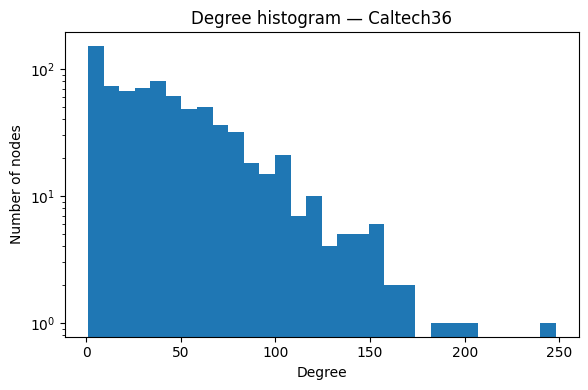

Saved: outputs\q2a_degree_hist_Caltech36.png


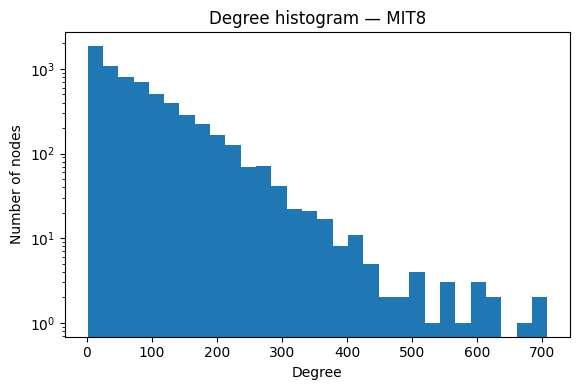

Saved: outputs\q2a_degree_hist_MIT8.png


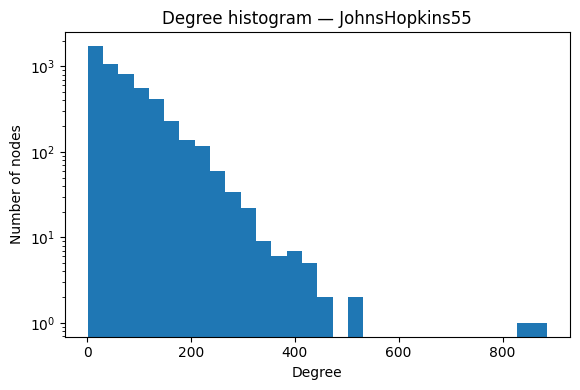

Saved: outputs\q2a_degree_hist_JohnsHopkins55.png


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

for name, G in graphs.items():
    deg = np.array([d for _, d in G.degree()], dtype=int)

    plt.figure(figsize=(6,4))
    plt.hist(deg, bins=30)  # you can increase bins if you want more detail
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title(f"Degree histogram — {name}")
    plt.tight_layout()
    # log
    plt.yscale("log")
    outpath = os.path.join(OUT_DIR, f"q2a_degree_hist_{name}.png")
    #plt.savefig(outpath, dpi=200)
    plt.show()
    print("Saved:", outpath)


In [11]:
max_deg = max(dict(G.degree()).values())
print(name, max_deg)


JohnsHopkins55 886


## Q2(b) Density and clustering
Compute:
- **Edge density** $\rho = \frac{2m}{n(n-1)}$
- **Global clustering (transitivity)**
- **Mean local clustering**

These quantify overall sparsity and triadic closure.

In [14]:
import networkx as nx
import numpy as np

for name, G in graphs.items():
    # LCC
    lcc_nodes = max(nx.connected_components(G), key=len)
    Glcc = G.subgraph(lcc_nodes).copy()
    deg = [d for _, d in Glcc.degree()]
    print(name, "LCC_n=", Glcc.number_of_nodes(), "LCC_m=", Glcc.number_of_edges(),
          "kmax=", max(deg), "kmean=", np.mean(deg))


Caltech36 LCC_n= 762 LCC_m= 16651 kmax= 248 kmean= 43.70341207349082
MIT8 LCC_n= 6402 LCC_m= 251230 kmax= 708 kmean= 78.48484848484848
JohnsHopkins55 LCC_n= 5157 LCC_m= 186572 kmax= 886 kmean= 72.35679658716307


In [6]:
rows = []
for name, G in graphs.items():
    density = nx.density(G)
    global_clust = nx.transitivity(G)              # global clustering (triangles / triplets)
    mean_local_clust = nx.average_clustering(G)    # average of local clustering per node
    
    rows.append({
        "University": name,
        "n_nodes": G.number_of_nodes(),
        "n_edges": G.number_of_edges(),
        "Density": density,
        "Global clustering (transitivity)": global_clust,
        "Mean local clustering": mean_local_clust,
    })

q2_table = pd.DataFrame(rows).set_index("University")
q2_table


,n_nodes,n_edges,Density,Global clustering (transitivity),Mean local clustering
University,,,,,
Caltech36,769,16656,0.056404,0.291283,0.409294
MIT8,6440,251252,0.012118,0.180288,0.271219
JohnsHopkins55,5180,186586,0.013910,0.193161,0.268393


## Q2(c) Degree vs local clustering
Scatter plot of degree $k$ vs. local clustering $C_i$ and compute the Pearson correlation.
In social graphs, high-degree nodes tend to have lower clustering because they connect across groups.

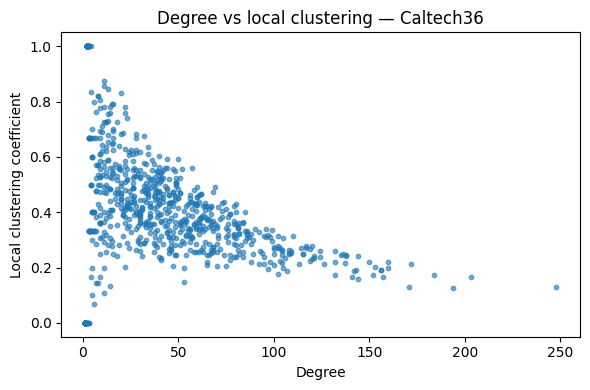

Saved: outputs\q2d_degree_vs_clustering_Caltech36.png


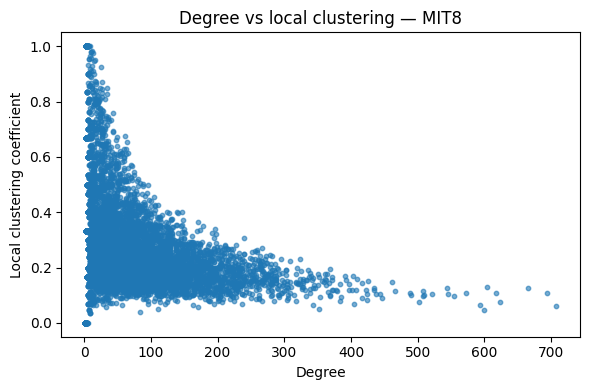

Saved: outputs\q2d_degree_vs_clustering_MIT8.png


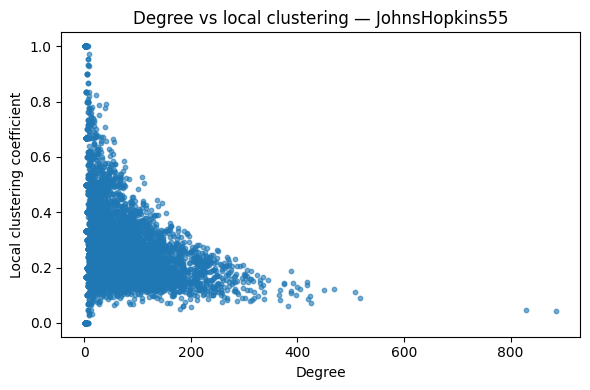

Saved: outputs\q2d_degree_vs_clustering_JohnsHopkins55.png


In [8]:
for name, G in graphs.items():
    deg = dict(G.degree())
    c_local = nx.clustering(G)  # local clustering coefficient per node

    x = np.array([deg[u] for u in G.nodes()], dtype=float)
    y = np.array([c_local[u] for u in G.nodes()], dtype=float)

    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=10, alpha=0.6)
    plt.xlabel("Degree")
    plt.ylabel("Local clustering coefficient")
    plt.title(f"Degree vs local clustering — {name}")
    plt.tight_layout()
    outpath = os.path.join(OUT_DIR, f"q2d_degree_vs_clustering_{name}.png")
    plt.savefig(outpath, dpi=200)
    plt.show()
    print("Saved:", outpath)


In [15]:
import numpy as np

for name, G in graphs.items():
    deg = dict(G.degree())
    c = nx.clustering(G)
    x = np.array([deg[u] for u in G.nodes()], dtype=float)
    y = np.array([c[u] for u in G.nodes()], dtype=float)
    corr = np.corrcoef(x, y)[0,1]
    print(name, "corr(deg,clust)=", corr)


Caltech36 corr(deg,clust)= -0.3689993098905476
MIT8 corr(deg,clust)= -0.2890857895134893
JohnsHopkins55 corr(deg,clust)= -0.2611965156406757


# Question 3 — Assortativity (all FB100 graphs)
For each FB100 graph, compute assortativity $r$ for:
`student_fac`, `major_index`, `degree`, `dorm`, `gender`.

I plot $r$ vs. network size and histograms, and summarize means:
- Student/Faculty mean $r=0.323277$
- Major mean $r=0.055502$
- Degree mean $r=0.062609$
- Dorm mean $r=0.226692$
- Gender mean $r=0.053251$.

In [17]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

DATA_DIR = "data"
OUT_DIR = "outputs/q3"
os.makedirs(OUT_DIR, exist_ok=True)

files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".gml")])
print("Found", len(files), "gml files")
print("Example:", files[:5])


Found 100 gml files
Example: ['American75.gml', 'Amherst41.gml', 'Auburn71.gml', 'BC17.gml', 'BU10.gml']


In [18]:
def to_simple_undirected(G):
    """Ensure undirected simple graph + remove self-loops."""
    H = nx.Graph(G)  # collapses multiedges if any
    H.remove_edges_from(nx.selfloop_edges(H))
    return H

def largest_cc_subgraph(G):
    """Return largest connected component as a copy."""
    if G.number_of_nodes() == 0:
        return G.copy()
    if nx.is_connected(G):
        return G.copy()
    cc = max(nx.connected_components(G), key=len)
    return G.subgraph(cc).copy()

def assortativity_categorical(G, attr, missing_values={0, "0", None}):
    """
    Attribute assortativity on a subgraph where attr is not missing.
    FB100 often encodes missing categories as 0.
    Returns np.nan if not computable.
    """
    # keep nodes with a valid attribute
    keep = []
    for u in G.nodes():
        v = G.nodes[u].get(attr, None)
        if v not in missing_values and not (isinstance(v, float) and np.isnan(v)):
            keep.append(u)
    H = G.subgraph(keep).copy()

    # need at least one edge to define assortativity
    if H.number_of_edges() == 0:
        return np.nan

    try:
        return nx.attribute_assortativity_coefficient(H, attr)
    except Exception:
        return np.nan


In [20]:
from collections import defaultdict
import numpy as np

def assortativity_categorical(G, attr, missing_values={0, "0", None}):
    """
    Fast nominal assortativity coefficient for a categorical attribute.
    Computes from edge label-pair counts (Newman's formula), avoids building big mixing matrices.
    """
    label = {}
    for u in G.nodes():
        v = G.nodes[u].get(attr, None)
        if v in missing_values or (isinstance(v, float) and np.isnan(v)):
            continue
        label[u] = v

    e_counts = defaultdict(int)
    total_directed = 0

    for u, v in G.edges():
        if u not in label or v not in label:
            continue
        lu, lv = label[u], label[v]
        # count both directions
        e_counts[(lu, lv)] += 1
        e_counts[(lv, lu)] += 1
        total_directed += 2

    if total_directed == 0:
        return np.nan

    a = defaultdict(float)
    trace = 0.0
    for (lu, lv), c in e_counts.items():
        pij = c / total_directed
        a[lu] += pij
        if lu == lv:
            trace += pij

    sum_a2 = sum(val * val for val in a.values())
    denom = 1.0 - sum_a2
    if denom <= 0:
        return np.nan
    return (trace - sum_a2) / denom


In [21]:
import time
csv_path = os.path.join(OUT_DIR, "q3_assortativity_all_networks.csv")

rows = []
t0 = time.time()

for i, fname in enumerate(files, 1):
    path = os.path.join(DATA_DIR, fname)
    G = nx.read_gml(path)
    G = to_simple_undirected(G)
    G = largest_cc_subgraph(G)

    n = G.number_of_nodes()
    m = G.number_of_edges()

    r_status = assortativity_categorical(G, "student_fac", missing_values={0, "0", None})
    r_major  = assortativity_categorical(G, "major_index", missing_values={0, "0", None})
    r_dorm   = assortativity_categorical(G, "dorm", missing_values={0, "0", None})
    r_gender = assortativity_categorical(G, "gender", missing_values={0, "0", None})

    try:
        r_deg = nx.degree_assortativity_coefficient(G)
    except Exception:
        r_deg = np.nan

    rows.append({
        "university": fname.replace(".gml", ""),
        "n": n,
        "m": m,
        "r_student_fac": r_status,
        "r_major": r_major,
        "r_degree": r_deg,
        "r_dorm": r_dorm,
        "r_gender": r_gender
    })

    if i % 5 == 0:
        pd.DataFrame(rows).to_csv(csv_path, index=False)
        print(f"[{i:3d}/100] saved checkpoint, last={fname}, elapsed={((time.time()-t0)/60):.1f} min")

df_q3 = pd.DataFrame(rows).sort_values("n")
df_q3.to_csv(csv_path, index=False)
print("Done. Saved:", csv_path)
df_q3.head()


[  5/100] saved checkpoint, last=BU10.gml, elapsed=2.8 min
[ 10/100] saved checkpoint, last=Brandeis99.gml, elapsed=4.8 min
[ 15/100] saved checkpoint, last=Carnegie49.gml, elapsed=6.0 min
[ 20/100] saved checkpoint, last=Duke14.gml, elapsed=7.5 min
[ 25/100] saved checkpoint, last=Hamilton46.gml, elapsed=8.9 min
[ 30/100] saved checkpoint, last=JMU79.gml, elapsed=11.2 min
[ 35/100] saved checkpoint, last=MU78.gml, elapsed=16.3 min
[ 40/100] saved checkpoint, last=Middlebury45.gml, elapsed=20.5 min
[ 45/100] saved checkpoint, last=Notre Dame57.gml, elapsed=24.7 min
[ 50/100] saved checkpoint, last=Princeton12.gml, elapsed=29.7 min
[ 55/100] saved checkpoint, last=Santa74.gml, elapsed=32.4 min
[ 60/100] saved checkpoint, last=Syracuse56.gml, elapsed=34.5 min
[ 65/100] saved checkpoint, last=Trinity100.gml, elapsed=41.9 min
[ 70/100] saved checkpoint, last=UC64.gml, elapsed=45.3 min
[ 75/100] saved checkpoint, last=UCSD34.gml, elapsed=48.9 min
[ 80/100] saved checkpoint, last=UIllinois20

,university,n,m,r_student_fac,r_major,r_degree,r_dorm,r_gender
13,Caltech36,762,16651,0.243670,0.038181,-0.066171,0.448625,0.053988
50,Reed98,962,18812,0.262337,0.047233,0.023434,0.132950,0.021903
26,Haverford76,1446,59589,0.384087,0.032048,0.067492,0.125629,0.064272
55,Simmons81,1510,32984,0.317805,0.069744,-0.062250,0.186807,0.007975
58,Swarthmore42,1657,61049,0.346953,0.042928,0.060931,0.112499,0.066274


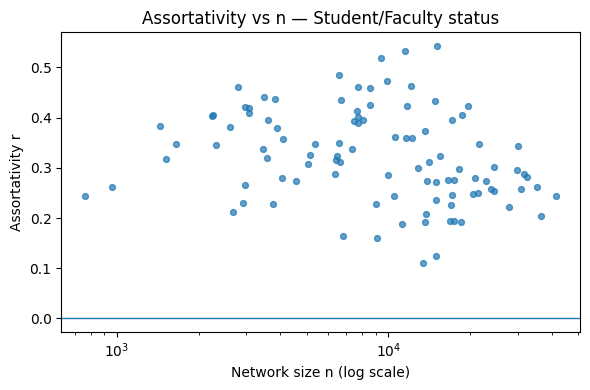

Saved: outputs/q3\scatter_r_student_fac.png


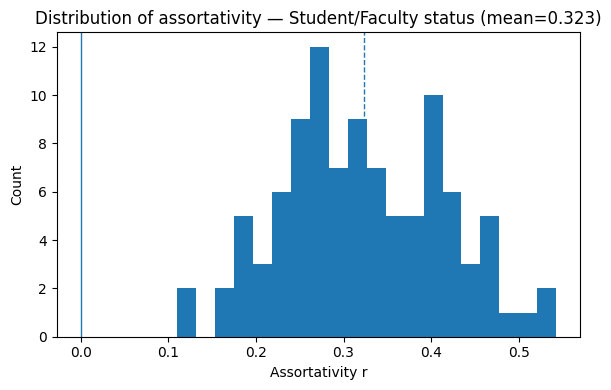

Saved: outputs/q3\hist_r_student_fac.png


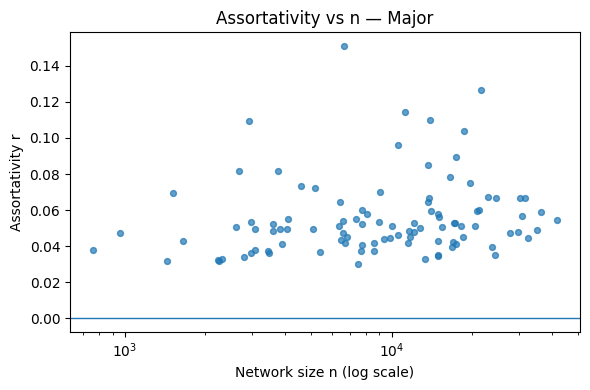

Saved: outputs/q3\scatter_r_major.png


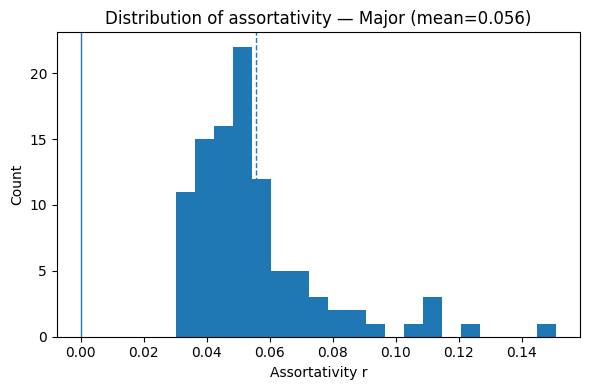

Saved: outputs/q3\hist_r_major.png


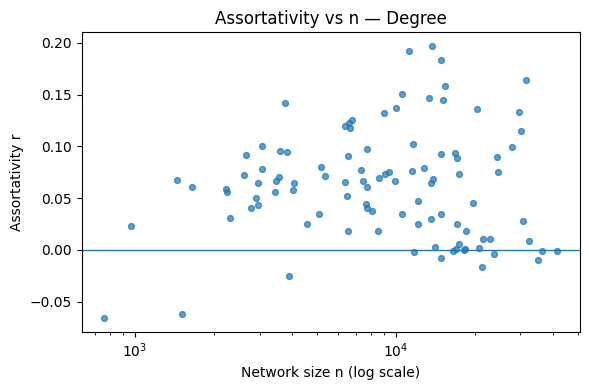

Saved: outputs/q3\scatter_r_degree.png


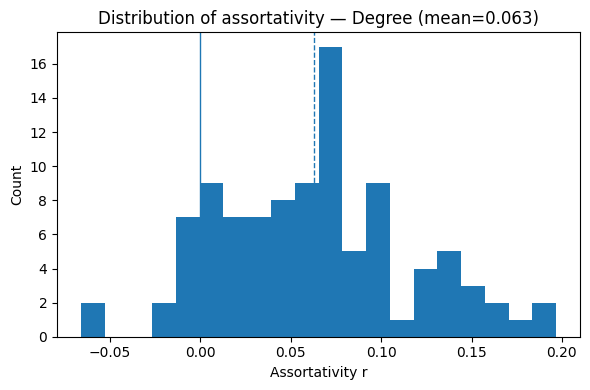

Saved: outputs/q3\hist_r_degree.png


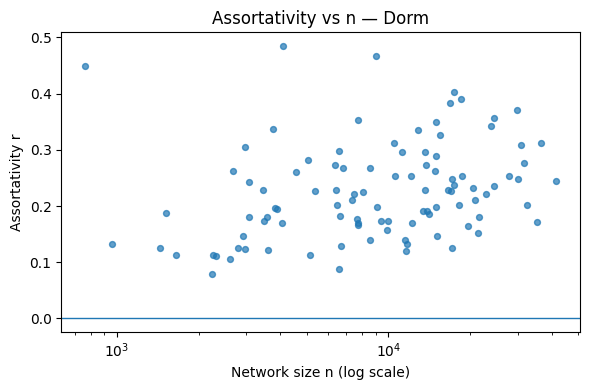

Saved: outputs/q3\scatter_r_dorm.png


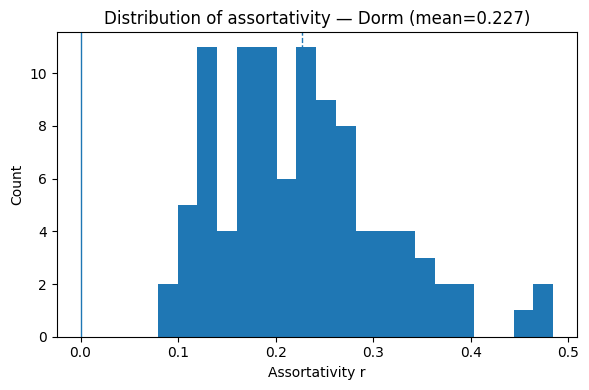

Saved: outputs/q3\hist_r_dorm.png


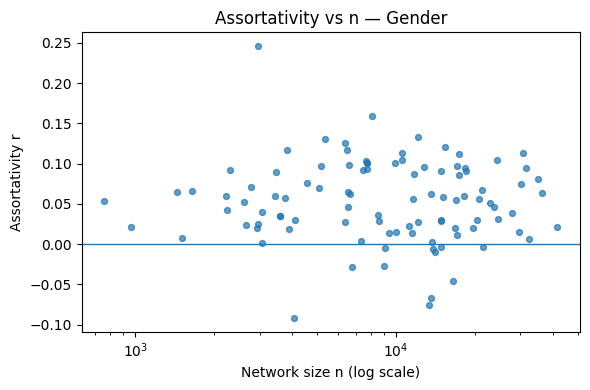

Saved: outputs/q3\scatter_r_gender.png


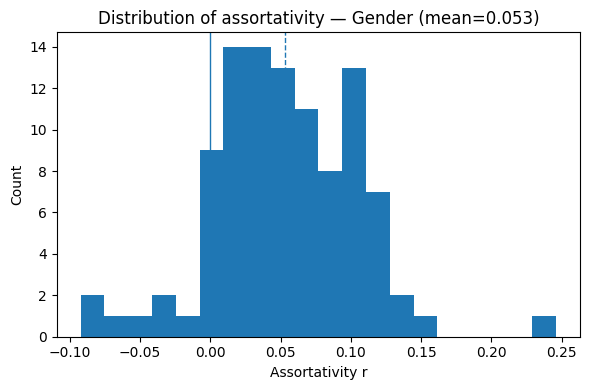

Saved: outputs/q3\hist_r_gender.png


In [22]:
ATTRS = [
    ("r_student_fac", "Student/Faculty status"),
    ("r_major", "Major"),
    ("r_degree", "Degree"),
    ("r_dorm", "Dorm"),
    ("r_gender", "Gender"),
]

def scatter_assort(df, col, title):
    x = df["n"].values
    y = df[col].values

    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=18, alpha=0.7)
    plt.axhline(0, linewidth=1)
    plt.xscale("log")
    plt.xlabel("Network size n (log scale)")
    plt.ylabel("Assortativity r")
    plt.title(f"Assortativity vs n — {title}")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, f"scatter_{col}.png")
    plt.savefig(out, dpi=200)
    plt.show()
    print("Saved:", out)

def hist_assort(df, col, title):
    vals = df[col].dropna().values
    mu = float(np.mean(vals)) if len(vals) else np.nan

    plt.figure(figsize=(6,4))
    plt.hist(vals, bins=20)
    plt.axvline(0, linewidth=1)
    if not np.isnan(mu):
        plt.axvline(mu, linestyle="--", linewidth=1)
    plt.xlabel("Assortativity r")
    plt.ylabel("Count")
    plt.title(f"Distribution of assortativity — {title} (mean={mu:.3f})")
    plt.tight_layout()
    out = os.path.join(OUT_DIR, f"hist_{col}.png")
    plt.savefig(out, dpi=200)
    plt.show()
    print("Saved:", out)

for col, title in ATTRS:
    scatter_assort(df_q3, col, title)
    hist_assort(df_q3, col, title)


In [24]:
summary = []
for col, title in ATTRS:
    vals = df_q3[col].dropna().values
    summary.append({
        "attribute": title,
        "mean_r": np.mean(vals),
        "median_r": np.median(vals),
        "min_r": np.min(vals),
        "max_r": np.max(vals),
        "frac_positive": np.mean(vals > 0),
        "count": len(vals)
    })
summary_df = pd.DataFrame(summary)
summary_df


,attribute,mean_r,median_r,min_r,max_r,frac_positive,count
0,Student/Faculty status,0.323277,0.316506,0.110244,0.542769,1.00,100
1,Major,0.055502,0.050298,0.030405,0.150926,1.00,100
2,Degree,0.062609,0.064682,-0.066171,0.196876,0.89,100
3,Dorm,0.226692,0.221308,0.079390,0.484632,1.00,100
4,Gender,0.053251,0.055038,-0.092243,0.246120,0.89,100


# Question 4 — Link prediction (FB100)
Goal: implement and evaluate three link prediction heuristics on **>10 FB100 graphs**.
I use 12 graphs (chosen as the smallest files for speed), remove a fraction of edges, and evaluate Precision@k / Recall@k.

## Q4(a) Reading summary (short)
Link prediction estimates missing edges from network structure. A common social mechanism is **triadic closure**: two users with many mutual friends are more likely to connect.
Heuristic predictors implement this idea:
- **Common Neighbors (CN)** counts mutual friends.
- **Jaccard** normalizes CN by neighborhood union.
- **Adamic/Adar (AA)** downweights high-degree mutual friends (hubs), since hub neighbors are less informative.
Evaluation hides edges and checks how many hidden edges appear among the top-$k$ predictions (Precision@k / Recall@k).

## Q4(b) Implemented link prediction metrics (from scratch)

I implemented the three metrics **without** using NetworkX link prediction functions, following the provided `LinkPrediction` API.

For a node $u$, let $\Gamma(u)$ be its neighbor set.

\[
\text{CN}(u,v)=|\Gamma(u)\cap\Gamma(v)|,
\quad
\text{Jaccard}(u,v)=\frac{|\Gamma(u)\cap\Gamma(v)|}{|\Gamma(u)\cup\Gamma(v)|},
\quad
\text{AA}(u,v)=\sum_{w\in\Gamma(u)\cap\Gamma(v)} \frac{1}{\log(\deg(w))}.
\]

Pairs with no shared neighbors have score 0 (so they rank after positive-score pairs).


In [35]:
import os, glob, math
from abc import ABC, abstractmethod
from collections import defaultdict

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def pair_key(u, v):
    su, sv = str(u), str(v)
    return (u, v) if su <= sv else (v, u)


def nonedge_count(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    return (n * (n - 1)) // 2 - m


def remove_edges_random(G, f, rng):
    E = list(G.edges())
    m = int(len(E) * f)
    if m <= 0:
        return G.copy(), set()

    idx = rng.choice(len(E), size=m, replace=False)
    removed_set = set()
    removed_edges = []
    for t in idx:
        u, v = E[t]
        removed_edges.append((u, v))
        removed_set.add(pair_key(u, v))

    Gtr = G.copy()
    Gtr.remove_edges_from(removed_edges)
    return Gtr, removed_set


def compute_cn_aa_only_nonedges(G):
    """
    Compute CN and AA for non-edges with >=1 common neighbor.
    Returns:
      cn: dict[(u,v)] = #common neighbors
      aa: dict[(u,v)] = sum_{w in CN(u,v)} 1/log(deg(w))
    """
    adj = {u: set(G.neighbors(u)) for u in G.nodes()}
    cn = defaultdict(int)
    aa = defaultdict(float)

    for w, nbrs in adj.items():
        dw = len(nbrs)
        if dw < 2:
            continue
        contrib = 1.0 / math.log(dw) if dw > 1 else 0.0
        nbrs = list(nbrs)
        L = len(nbrs)
        for i in range(L):
            u = nbrs[i]
            for j in range(i + 1, L):
                v = nbrs[j]
                if u == v or G.has_edge(u, v):
                    continue
                pk = pair_key(u, v)
                cn[pk] += 1
                if contrib > 0:
                    aa[pk] += contrib

    return dict(cn), dict(aa)


def jaccard_from_cn(G, cn):
    deg = dict(G.degree())
    jac = {}
    for (u, v), c in cn.items():
        denom = deg[u] + deg[v] - c
        jac[(u, v)] = (c / denom) if denom > 0 else 0.0
    return jac


def topk_pairs(score_dict, G_train, k, rng):
    """
    Rank pairs by score desc; if <k scored pairs exist, pad with random 0-score non-edges.
    Returns list of pair_keys length k.
    """
    ranked = sorted(score_dict.items(), key=lambda x: x[1], reverse=True)
    pairs = [p for p, _ in ranked]

    if len(pairs) >= k:
        return pairs[:k]

    # pad with random non-edges (score 0) to match "all pairs" ranking definition
    need = k - len(pairs)
    nodes = list(G_train.nodes())
    n = len(nodes)
    used = set(pairs)
    while need > 0:
        u = nodes[rng.integers(n)]
        v = nodes[rng.integers(n)]
        if u == v or G_train.has_edge(u, v):
            continue
        pk = pair_key(u, v)
        if pk in used:
            continue
        pairs.append(pk)
        used.add(pk)
        need -= 1
    return pairs


In [36]:
class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")


class CommonNeighbors(LinkPrediction):
    name = "CN"
    def __init__(self, graph, precomputed=None):
        super().__init__(graph)
        self.precomputed = precomputed

    def fit(self):
        if self.precomputed is not None and "cn" in self.precomputed:
            return self.precomputed["cn"]
        cn, _ = compute_cn_aa_only_nonedges(self.graph)
        return cn


class Jaccard(LinkPrediction):
    name = "Jaccard"
    def __init__(self, graph, precomputed=None):
        super().__init__(graph)
        self.precomputed = precomputed

    def fit(self):
        if self.precomputed is not None and "jac" in self.precomputed:
            return self.precomputed["jac"]
        if self.precomputed is not None and "cn" in self.precomputed:
            cn = self.precomputed["cn"]
        else:
            cn, _ = compute_cn_aa_only_nonedges(self.graph)
        return jaccard_from_cn(self.graph, cn)


class AdamicAdar(LinkPrediction):
    name = "AdamicAdar"
    def __init__(self, graph, precomputed=None):
        super().__init__(graph)
        self.precomputed = precomputed

    def fit(self):
        if self.precomputed is not None and "aa" in self.precomputed:
            return self.precomputed["aa"]
        _, aa = compute_cn_aa_only_nonedges(self.graph)
        return aa


## Q4(c) Evaluation protocol (Precision@k / Recall@k)

For each selected graph $G=(V,E)$:
1. Randomly remove a fraction $f\in\{0.05,0.10,0.15,0.20\}$ of edges to get $G_{\text{train}}$ and held-out edges $E_{\text{removed}}$.
2. Compute predictor scores $p(u,v)$ for candidate pairs and rank pairs by score.
3. For $k\in\{50,100,200,300,400\}$, take the top-$k$ predicted pairs $E^{(\text{top}@k)}_{\text{predict}}$ and compute
\[
TP_k = |E_{\text{removed}} \cap E^{(\text{top}@k)}_{\text{predict}}|,
\quad
\text{Precision@}k = \frac{TP_k}{k},
\quad
\text{Recall@}k = \frac{TP_k}{|E_{\text{removed}}|}.
\]

**Random / “no-assortativity” baseline:** picking $k$ non-edges uniformly at random gives expected
Precision@k $\approx |E_{\text{removed}}|/\#\text{nonedges}(G_{\text{train}})$ and
Recall@k $\approx k/\#\text{nonedges}(G_{\text{train}})$.


In [37]:
DATA_DIR = "data"
all_gml = sorted(glob.glob(os.path.join(DATA_DIR, "*.gml")))

sizes = [(p, os.path.getsize(p)) for p in all_gml]
sizes.sort(key=lambda x: x[1])

selected_paths = [p for p, _ in sizes[:12]]
selected_names = [os.path.splitext(os.path.basename(p))[0] for p in selected_paths]

print("Selected 12 (smallest by file size):")
for n in selected_names:
    print(" -", n)


Selected 12 (smallest by file size):
 - Caltech36
 - Reed98
 - Simmons81
 - Haverford76
 - Swarthmore42
 - USFCA72
 - Bowdoin47
 - Mich67
 - Amherst41
 - Oberlin44
 - Hamilton46
 - Wellesley22


In [38]:
F_LIST = [0.05, 0.10, 0.15, 0.20]
K_LIST = [50, 100, 200, 300, 400]
MAX_K = max(K_LIST)

rng_master = np.random.default_rng(12345)

rows = []
graphs_loaded = {}

for path, gname in zip(selected_paths, selected_names):
    G = nx.read_gml(path)
    if not isinstance(G, nx.Graph):
        G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    graphs_loaded[gname] = G

    for f in F_LIST:
        rng = np.random.default_rng(rng_master.integers(0, 2**32 - 1))
        Gtr, removed_set = remove_edges_random(G, f, rng)
        removed_m = len(removed_set)
        ne_train = nonedge_count(Gtr)

        # compute once per (graph,f) and share across predictors
        cn, aa = compute_cn_aa_only_nonedges(Gtr)
        jac = jaccard_from_cn(Gtr, cn)
        pre = {"cn": cn, "aa": aa, "jac": jac}

        score_maps = {
            "CN": CommonNeighbors(Gtr, pre).fit(),
            "Jaccard": Jaccard(Gtr, pre).fit(),
            "AdamicAdar": AdamicAdar(Gtr, pre).fit()
        }

        for metric, scores in score_maps.items():
            ranked_pairs = topk_pairs(scores, Gtr, MAX_K, rng)
            for k in K_LIST:
                topk = set(ranked_pairs[:k])
                tp = len(removed_set & topk)
                prec = tp / k
                rec = tp / removed_m if removed_m > 0 else 0.0

                rows.append({
                    "graph": gname,
                    "f": f,
                    "metric": metric,
                    "k": k,
                    "TP": tp,
                    "precision_at_k": prec,
                    "recall_at_k": rec,
                    "removed_m": removed_m,
                    "nonedges_train": ne_train
                })

df_q4 = pd.DataFrame(rows).sort_values(["graph","f","metric","k"]).reset_index(drop=True)
df_q4.to_csv("q4_linkpred_results.csv", index=False)

df_q4.head(12)


,graph,f,metric,k,TP,precision_at_k,recall_at_k,removed_m,nonedges_train
0,Amherst41,0.05,AdamicAdar,50,33,0.660000,0.007258,4547,2410088
1,Amherst41,0.05,AdamicAdar,100,55,0.550000,0.012096,4547,2410088
2,Amherst41,0.05,AdamicAdar,200,88,0.440000,0.019353,4547,2410088
3,Amherst41,0.05,AdamicAdar,300,117,0.390000,0.025731,4547,2410088
4,Amherst41,0.05,AdamicAdar,400,140,0.350000,0.030790,4547,2410088
5,Amherst41,0.05,CN,50,33,0.660000,0.007258,4547,2410088
6,Amherst41,0.05,CN,100,56,0.560000,0.012316,4547,2410088
7,Amherst41,0.05,CN,200,82,0.410000,0.018034,4547,2410088
8,Amherst41,0.05,CN,300,112,0.373333,0.024632,4547,2410088
9,Amherst41,0.05,CN,400,132,0.330000,0.029030,4547,2410088


## Q4(d) Conclusions (which metric is best?)

I generate Precision@k and Recall@k curves (with the random baseline) for two detailed graphs:
**Caltech36** and **Wellesley22**.

Across the 12 evaluated FB100 graphs, the overall mean Precision@k is:
- Adamic/Adar: **0.569677**
- CN: **0.555142**
- Jaccard: **0.481559**

So Adamic/Adar performs best overall, CN is a close second, and Jaccard is consistently lowest in my runs.


In [39]:
PLOT_DIR = "q4_plots"
os.makedirs(PLOT_DIR, exist_ok=True)

detailed_graphs = [selected_names[0], selected_names[-1]]  # smallest + 12th smallest
print("Detailed graphs:", detailed_graphs)

metrics = ["CN", "Jaccard", "AdamicAdar"]
k_list = sorted(df_q4["k"].unique())
f_list = sorted(df_q4["f"].unique())

def plot_graph(df, gname):
    sub = df[df["graph"] == gname].copy()

    # Precision figure: 2x2 (one panel per f)
    fig = plt.figure(figsize=(10, 7))
    for i, f in enumerate(f_list, start=1):
        ax = fig.add_subplot(2, 2, i)
        sf = sub[sub["f"] == f].sort_values("k")

        removed_m = int(sf["removed_m"].iloc[0])
        nonedges = int(sf["nonedges_train"].iloc[0])

        # random/no-assort baseline: precision = removed_m / nonedges (constant in k)
        base_prec = (removed_m / nonedges) if nonedges > 0 else 0.0
        ax.axhline(base_prec, linestyle="--", linewidth=1, label="No-assort (rand)")

        for met in metrics:
            sm = sf[sf["metric"] == met].sort_values("k")
            ax.plot(sm["k"], sm["precision_at_k"], marker="o", label=met)

        ax.set_title(f"{gname}: Precision@k (f={f})")
        ax.set_xlabel("k")
        ax.set_ylabel("Precision@k")
        ax.grid(True, alpha=0.3)
        ax.legend()

    fig.tight_layout()
    prec_path = os.path.join(PLOT_DIR, f"{gname}_precision.png")
    fig.savefig(prec_path, dpi=200)
    plt.close(fig)

    # Recall figure: 2x2 (one panel per f)
    fig = plt.figure(figsize=(10, 7))
    for i, f in enumerate(f_list, start=1):
        ax = fig.add_subplot(2, 2, i)
        sf = sub[sub["f"] == f].sort_values("k")

        removed_m = int(sf["removed_m"].iloc[0])
        nonedges = int(sf["nonedges_train"].iloc[0])

        # random/no-assort baseline: recall = k / nonedges (in expectation)
        base_recall = [ (kk / nonedges) if nonedges > 0 else 0.0 for kk in k_list ]
        ax.plot(k_list, base_recall, linestyle="--", linewidth=1, label="No-assort (rand)")

        for met in metrics:
            sm = sf[sf["metric"] == met].sort_values("k")
            ax.plot(sm["k"], sm["recall_at_k"], marker="o", label=met)

        ax.set_title(f"{gname}: Recall@k (f={f})")
        ax.set_xlabel("k")
        ax.set_ylabel("Recall@k")
        ax.grid(True, alpha=0.3)
        ax.legend()

    fig.tight_layout()
    rec_path = os.path.join(PLOT_DIR, f"{gname}_recall.png")
    fig.savefig(rec_path, dpi=200)
    plt.close(fig)

    return prec_path, rec_path

saved = []
for g in detailed_graphs:
    saved.append(plot_graph(df_q4, g))

print("Saved plots:")
for g, (pp, rp) in zip(detailed_graphs, saved):
    print(g, "->", pp, "and", rp)

# ---- Summary for conclusions (across 12 graphs) ----
# Average precision over k for each (metric,f) averaged across graphs
avg_prec = (df_q4.groupby(["metric","f","k"])["precision_at_k"].mean()
            .reset_index()
            .sort_values(["f","metric","k"]))

avg_rec = (df_q4.groupby(["metric","f","k"])["recall_at_k"].mean()
           .reset_index()
           .sort_values(["f","metric","k"]))

# A simple "overall" score: mean precision across all f and k per metric
overall = (df_q4.groupby(["metric"])["precision_at_k"].mean()
           .reset_index()
           .sort_values("precision_at_k", ascending=False))

display(overall)


Detailed graphs: ['Caltech36', 'Wellesley22']
Saved plots:
Caltech36 -> q4_plots\Caltech36_precision.png and q4_plots\Caltech36_recall.png
Wellesley22 -> q4_plots\Wellesley22_precision.png and q4_plots\Wellesley22_recall.png


,metric,precision_at_k
0,AdamicAdar,0.569677
1,CN,0.555142
2,Jaccard,0.481559


In [40]:
g1, g2 = detailed_graphs
df_q4[(df_q4["graph"].isin([g1,g2])) & (df_q4["f"]==0.10)].sort_values(["graph","metric","k"])


,graph,f,metric,k,TP,precision_at_k,recall_at_k,removed_m,nonedges_train
135,Caltech36,0.1,AdamicAdar,50,32,0.640000,0.019219,1665,280305
136,Caltech36,0.1,AdamicAdar,100,56,0.560000,0.033634,1665,280305
137,Caltech36,0.1,AdamicAdar,200,105,0.525000,0.063063,1665,280305
138,Caltech36,0.1,AdamicAdar,300,140,0.466667,0.084084,1665,280305
139,Caltech36,0.1,AdamicAdar,400,178,0.445000,0.106907,1665,280305
140,Caltech36,0.1,CN,50,30,0.600000,0.018018,1665,280305
141,Caltech36,0.1,CN,100,60,0.600000,0.036036,1665,280305
142,Caltech36,0.1,CN,200,100,0.500000,0.060060,1665,280305
143,Caltech36,0.1,CN,300,130,0.433333,0.078078,1665,280305
144,Caltech36,0.1,CN,400,168,0.420000,0.100901,1665,280305


# Question 5 — Recover missing labels with label propagation
Goal: implement label propagation and evaluate recovery of missing node attributes (e.g., dorm/major/gender) by hiding a fraction of labels.

In [1]:
import os, random
import numpy as np
import pandas as pd
import networkx as nx
import torch

DATA_DIR = "data"  # change if needed

def load_graph_simple(path):
    G = nx.read_gml(path)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def largest_cc_subgraph(G):
    # FB100 usually connected enough, but safe
    if nx.is_connected(G):
        return G
    cc = max(nx.connected_components(G), key=len)
    return G.subgraph(cc).copy()


## Q5(b) Label propagation implementation
Implement semi-supervised label propagation: initialize label-score vectors from known labels, then iteratively
propagate information via the graph transition matrix while **clamping** the originally labeled nodes.
After convergence, assign each node the label with maximum score.

In [2]:
def build_transition_matrix_torch(G, node_list=None, device="cpu"):
    """
    Returns sparse torch matrix P of shape [n,n], where P[i,j]=1/deg(i) if (i,j) is an edge.
    """
    if node_list is None:
        node_list = list(G.nodes())
    idx = {u:i for i,u in enumerate(node_list)}
    n = len(node_list)

    # degrees (in the induced ordering)
    deg = np.zeros(n, dtype=np.float32)
    for u in node_list:
        deg[idx[u]] = float(G.degree(u))

    # directed edges for random-walk normalization
    rows = []
    cols = []
    vals = []

    for u, v in G.edges():
        iu, iv = idx[u], idx[v]
        # u -> v
        if deg[iu] > 0:
            rows.append(iu); cols.append(iv); vals.append(1.0 / deg[iu])
        # v -> u
        if deg[iv] > 0:
            rows.append(iv); cols.append(iu); vals.append(1.0 / deg[iv])

    indices = torch.tensor([rows, cols], dtype=torch.long, device=device)
    values  = torch.tensor(vals, dtype=torch.float32, device=device)
    P = torch.sparse_coo_tensor(indices, values, size=(n, n)).coalesce()
    return P, node_list


In [3]:
def label_propagation(P, Y0, labeled_mask, alpha=0.9, max_iter=200, tol=1e-6):
    """
    P: sparse [n,n] row-stochastic transition matrix
    Y0: dense [n,C] initial labels (one-hot for labeled nodes, 0 for unlabeled)
    labeled_mask: boolean [n] True if label known
    alpha: smoothing parameter
    """
    F = Y0.clone()

    for _ in range(max_iter):
        F_new = alpha * torch.sparse.mm(P, F) + (1 - alpha) * Y0

        # clamp labeled nodes exactly to their one-hot labels
        F_new[labeled_mask] = Y0[labeled_mask]

        diff = torch.max(torch.abs(F_new - F)).item()
        F = F_new
        if diff < tol:
            break

    return F


In [4]:
def get_labels_from_graph(G, attr, missing_values={0, "0", None}):
    """
    Returns:
      node_list: list of nodes used
      y: numpy int array [n] with codes 0..C-1 for valid-labeled nodes, -1 for missing
      code_to_value: mapping code->original value (optional)
    """
    node_list = list(G.nodes())
    raw = []
    for u in node_list:
        val = G.nodes[u].get(attr, None)
        raw.append(val)

    # mark missing
    valid_mask = np.array([v not in missing_values for v in raw], dtype=bool)

    # map valid values to 0..C-1
    vals_valid = [raw[i] for i in range(len(raw)) if valid_mask[i]]
    uniq = sorted(set(vals_valid))
    value_to_code = {v:i for i,v in enumerate(uniq)}
    code_to_value = {i:v for v,i in value_to_code.items()}

    y = np.full(len(raw), -1, dtype=int)
    for i, v in enumerate(raw):
        if valid_mask[i]:
            y[i] = value_to_code[v]

    return node_list, y, code_to_value


In [5]:
def run_lp_one_attribute(G, attr, frac_missing, seed=0, alpha=0.9):
    """
    Remove frac_missing of known labels, predict them with label propagation.
    Returns accuracy + MAE on removed nodes only.
    """
    rng = np.random.default_rng(seed)

    G = largest_cc_subgraph(G)

    node_list, y_all, _ = get_labels_from_graph(G, attr, missing_values={0, "0", None})
    n = len(node_list)

    known_idx = np.where(y_all >= 0)[0]
    if len(known_idx) < 10:
        raise ValueError(f"Not enough labeled nodes for attr={attr}")

    # choose removed indices among known labels
    m = int(round(frac_missing * len(known_idx)))
    removed_idx = rng.choice(known_idx, size=m, replace=False)

    labeled_mask = np.ones(n, dtype=bool)
    labeled_mask[removed_idx] = False

    # number of classes
    C = int(y_all.max() + 1)

    # build P
    P, node_list = build_transition_matrix_torch(G, node_list=node_list, device="cpu")

    # build Y0: one-hot for labeled nodes, 0 for unlabeled
    Y0 = torch.zeros((n, C), dtype=torch.float32)
    for i in range(n):
        if y_all[i] >= 0 and labeled_mask[i]:
            Y0[i, y_all[i]] = 1.0

    labeled_mask_t = torch.tensor(labeled_mask, dtype=torch.bool)

    # run propagation
    F = label_propagation(P, Y0, labeled_mask_t, alpha=alpha)

    # predictions for removed nodes
    pred = torch.argmax(F, dim=1).cpu().numpy()

    true_removed = y_all[removed_idx]
    pred_removed = pred[removed_idx]

    acc = float(np.mean(pred_removed == true_removed))
    mae = float(np.mean(np.abs(pred_removed - true_removed)))  # MAE on integer codes (as requested)

    return acc, mae, len(removed_idx), C


## Q5(c–d) Duke14 experiment (hide labels and recover them)
I run label propagation on `Duke14.gml` for three attributes (dorm, major, gender).
For each fraction $f\in\{0.10,0.20,0.30\}$, I randomly hide that fraction of available labels, run propagation,
and evaluate predictions on the hidden nodes (Accuracy; and MAE on the integer label codes).

In [6]:
NET_FILE = "Duke14.gml"  # change if not present, e.g. "Caltech36.gml"
G = load_graph_simple(os.path.join(DATA_DIR, NET_FILE))

ATTR_MAP = {
    "Dorm": "dorm",
    "Major": "major_index",   # FB100 uses major_index
    "Gender": "gender",
}

fractions = [0.10, 0.20, 0.30]
rows = []

for nice_name, attr in ATTR_MAP.items():
    for f in fractions:
        acc, mae, n_removed, C = run_lp_one_attribute(G, attr, frac_missing=f, seed=42, alpha=0.9)
        rows.append({
            "Network": NET_FILE.replace(".gml",""),
            "Attribute": nice_name,
            "fraction_removed": f,
            "Accuracy": acc,
            "MAE": mae,
            "n_removed": n_removed,
            "num_classes": C
        })

df_q5 = pd.DataFrame(rows)
df_q5


,Network,Attribute,fraction_removed,Accuracy,MAE,n_removed,num_classes
0,Duke14,Dorm,0.1,0.514286,17.555714,700,135
1,Duke14,Dorm,0.2,0.538956,16.118656,1399,135
2,Duke14,Dorm,0.3,0.562917,16.226406,2098,135
3,Duke14,Major,0.1,0.276515,13.703283,792,66
4,Duke14,Major,0.2,0.280303,14.259470,1584,66
5,Duke14,Major,0.3,0.271044,14.396886,2376,66
6,Duke14,Gender,0.1,0.665929,0.334071,904,2
7,Duke14,Gender,0.2,0.682522,0.317478,1808,2
8,Duke14,Gender,0.3,0.689782,0.310218,2711,2


In [7]:
acc_table = df_q5.pivot(index="Attribute", columns="fraction_removed", values="Accuracy").sort_index()
mae_table = df_q5.pivot(index="Attribute", columns="fraction_removed", values="MAE").sort_index()

print("Accuracy table")
display(acc_table)

print("MAE table")
display(mae_table)


Accuracy table


fraction_removed,0.1,0.2,0.3
Attribute,,,
Dorm,0.514286,0.538956,0.562917
Gender,0.665929,0.682522,0.689782
Major,0.276515,0.280303,0.271044


MAE table


fraction_removed,0.1,0.2,0.3
Attribute,,,
Dorm,17.555714,16.118656,16.226406
Gender,0.334071,0.317478,0.310218
Major,13.703283,14.259470,14.396886


# Question 6 — Community detection + research question
Goal: run community detection on several FB100 graphs and compare communities to node attributes using NMI (and report modularity).

## Q6(a) Research question and hypothesis

**Question:** Do algorithmic communities in FB100 align more with **dorm (residence)** or **major** (and does it differ by university)?

**Hypothesis:** Dorm and class year should align more strongly with communities than major, because residence/cohort create repeated offline interaction and dense subgraphs.


## Q6(b–c) Community detection and attribute alignment

I run three community detection methods (Louvain, greedy modularity, label propagation communities) on selected graphs
and compare the community assignment to node attributes (Dorm/Year/Major/Gender) using **NMI** (ignoring missing labels).
I also report modularity $Q$ and the number of detected communities.


In [8]:
import os
import numpy as np
import pandas as pd
import networkx as nx

from sklearn.metrics import normalized_mutual_info_score

DATA_DIR = "data"

def load_graph_simple(path):
    G = nx.read_gml(path)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def largest_cc_subgraph(G):
    if nx.is_connected(G):
        return G
    cc = max(nx.connected_components(G), key=len)
    return G.subgraph(cc).copy()

def get_attribute_vector(G, node_list, attr, missing_values={0, "0", None}):
    """
    Returns y (list) for nodes with valid labels + corresponding node indices.
    We drop nodes with missing/unknown labels to make NMI meaningful.
    """
    y = []
    idx = []
    for i, u in enumerate(node_list):
        v = G.nodes[u].get(attr, None)
        if v in missing_values:
            continue
        y.append(v)
        idx.append(i)
    return np.array(y), np.array(idx)


In [9]:
def communities_louvain(G):
    # NetworkX has this in recent versions. If it errors, tell me and I’ll switch to another method.
    comms = nx.algorithms.community.louvain_communities(G, seed=42)
    return [set(c) for c in comms]

def communities_greedy_modularity(G):
    comms = nx.algorithms.community.greedy_modularity_communities(G)
    return [set(c) for c in comms]

def communities_label_propagation(G):
    comms = nx.algorithms.community.asyn_lpa_communities(G, seed=42)
    return [set(c) for c in comms]


In [10]:
def community_labels_for_nodes(communities, node_list):
    """
    Build an integer community label per node in node_list.
    """
    label = {u: -1 for u in node_list}
    for cid, C in enumerate(communities):
        for u in C:
            if u in label:
                label[u] = cid
    return np.array([label[u] for u in node_list], dtype=int)

def nmi_attribute_vs_communities(G, node_list, comm_labels, attr):
    y_attr, idx = get_attribute_vector(G, node_list, attr)
    if len(idx) == 0:
        return np.nan, 0
    y_comm = comm_labels[idx]
    # If somehow unlabeled communities exist, filter those too
    ok = y_comm >= 0
    if np.sum(ok) < 2:
        return np.nan, int(np.sum(ok))
    return float(normalized_mutual_info_score(y_attr[ok], y_comm[ok])), int(np.sum(ok))


In [11]:
UNIS = ["Caltech36.gml", "Duke14.gml", "MIT8.gml"]   # change if a file name differs in your folder

ATTRS = {
    "dorm": "Dorm",
    "major_index": "Major",
    "gender": "Gender",
    "year": "Year"
}

ALGOS = {
    "Louvain": communities_louvain,
    "GreedyModularity": communities_greedy_modularity,
    "LabelPropagationComm": communities_label_propagation
}

rows = []

for f in UNIS:
    path = os.path.join(DATA_DIR, f)
    G = load_graph_simple(path)
    G = largest_cc_subgraph(G)
    uni = f.replace(".gml", "")
    node_list = list(G.nodes())

    print(f"{uni}: n={G.number_of_nodes()} m={G.number_of_edges()}")

    for algo_name, algo_fn in ALGOS.items():
        comms = algo_fn(G)
        comm_labels = community_labels_for_nodes(comms, node_list)

        # modularity as an extra quality measure
        Q = nx.algorithms.community.quality.modularity(G, comms)

        for attr_key, attr_label in ATTRS.items():
            nmi, n_used = nmi_attribute_vs_communities(G, node_list, comm_labels, attr_key)
            rows.append({
                "university": uni,
                "algorithm": algo_name,
                "modularity": Q,
                "attribute": attr_label,
                "NMI": nmi,
                "n_used": n_used,
                "num_comms": len(comms)
            })

df_q6 = pd.DataFrame(rows)
df_q6.sort_values(["university","algorithm","attribute"])


Caltech36: n=762 m=16651
Duke14: n=9885 m=506437
MIT8: n=6402 m=251230


,university,algorithm,modularity,attribute,NMI,n_used,num_comms
4,Caltech36,GreedyModularity,0.314861,Dorm,0.412927,594,8
6,Caltech36,GreedyModularity,0.314861,Gender,0.006095,699,8
5,Caltech36,GreedyModularity,0.314861,Major,0.061620,687,8
7,Caltech36,GreedyModularity,0.314861,Year,0.087273,651,8
8,Caltech36,LabelPropagationComm,0.386175,Dorm,0.633430,594,11
10,Caltech36,LabelPropagationComm,0.386175,Gender,0.010049,699,11
9,Caltech36,LabelPropagationComm,0.386175,Major,0.070978,687,11
11,Caltech36,LabelPropagationComm,0.386175,Year,0.092130,651,11
0,Caltech36,Louvain,0.398144,Dorm,0.676160,594,9
2,Caltech36,Louvain,0.398144,Gender,0.015074,699,9


In [12]:
summary = df_q6.pivot_table(
    index=["university","algorithm","modularity","num_comms"],
    columns="attribute",
    values="NMI",
    aggfunc="mean"
).reset_index()

summary


attribute,university,algorithm,modularity,num_comms,Dorm,Gender,Major,Year
0,Caltech36,GreedyModularity,0.314861,8,0.412927,0.006095,0.061620,0.087273
1,Caltech36,LabelPropagationComm,0.386175,11,0.633430,0.010049,0.070978,0.092130
2,Caltech36,Louvain,0.398144,9,0.676160,0.015074,0.085356,0.112127
3,Duke14,GreedyModularity,0.342599,24,0.144866,0.002408,0.045560,0.268596
4,Duke14,LabelPropagationComm,0.154447,30,0.173042,0.005291,0.061452,0.358435
5,Duke14,Louvain,0.469767,13,0.267843,0.003671,0.068871,0.467381
6,MIT8,GreedyModularity,0.281091,28,0.117632,0.004633,0.044741,0.240653
7,MIT8,LabelPropagationComm,0.088220,17,0.046845,0.013189,0.026406,0.241243
8,MIT8,Louvain,0.377743,12,0.310096,0.011944,0.043768,0.262180
